In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np                            
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing libraries for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
#bussiness problem is whether the claimant hires attorney or not.

In [4]:
#loading dataset
dataset=pd.read_csv("E:\SaiVenkat\claimants.csv")
dataset

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [13]:
dataset.head() #printing first five observations of dataset

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [14]:
dataset.info() #checking missing values with the help of info.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [25]:
dataset.tail()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177
1339,34153,1,1.0,1.0,0.0,30.0,0.688


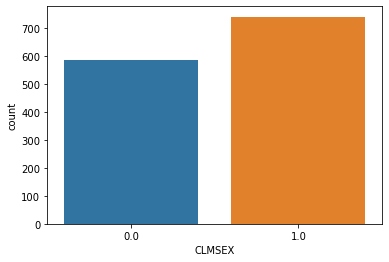

In [26]:
#comparing the values with the help of count plot.
sns.countplot(x='CLMSEX',data=dataset) 

In [27]:
dataset['CLMSEX'].value_counts() #checking values of each value separately 

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [29]:
#if we observe as casenum is unique which we dont need for predicting so dropping casenum from dataset
dataset.drop('CASENUM',axis=1,inplace=True)

In [30]:
dataset

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


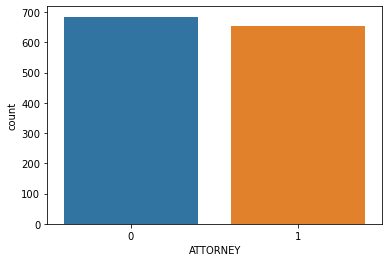

In [31]:
#checking how many categorical values are there in attorney column
sns.countplot(x="ATTORNEY",data=dataset)

In [32]:
dataset['ATTORNEY'].value_counts()

0    685
1    655
Name: ATTORNEY, dtype: int64

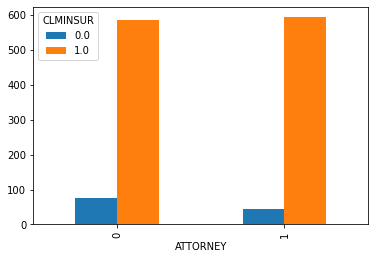

In [34]:
pd.crosstab(dataset["ATTORNEY"],dataset['CLMINSUR']).plot(kind='bar') #crosstab

In [35]:
pd.crosstab(dataset["ATTORNEY"],dataset['CLMINSUR']) 

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


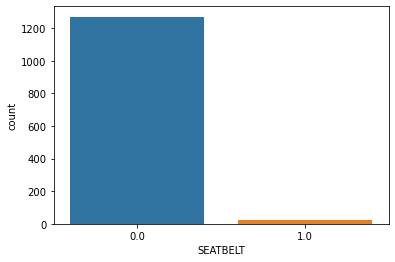

In [36]:
sns.countplot(x='SEATBELT',data=dataset) 

In [ ]:
#we can do more visualization as we want

In [37]:
dataset.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


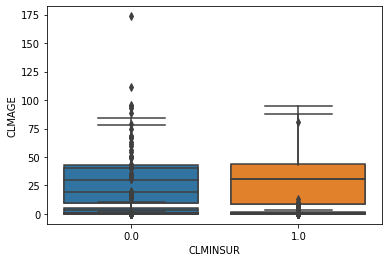

In [47]:
#boxplot comparisons with various variables
sns.boxplot(x='ATTORNEY',y='CLMSEX',data=dataset)
sns.boxplot(x='ATTORNEY',y='CLMINSUR',data=dataset)
sns.boxplot(x='ATTORNEY',y='SEATBELT',data=dataset)
sns.boxplot(x='ATTORNEY',y='CLMAGE',data=dataset)
sns.boxplot(x='ATTORNEY',y='LOSS',data=dataset)
sns.boxplot(x='CLMSEX',y='SEATBELT',data=dataset)
sns.boxplot(x='CLMINSUR',y='CLMAGE',data=dataset)

In [52]:
#checking the null values in dataset
dataset.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [54]:
dataset.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
#checking missing values and replacing with necessary values

In [55]:
dataset['CLMSEX'].mode()

0    1.0
dtype: float64

In [67]:
dataset['CLMSEX'].fillna(dataset['CLMSEX'].mode()[0],inplace=True)

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


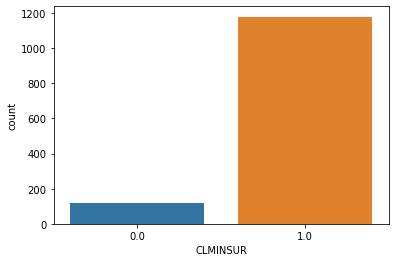

In [69]:
sns.countplot(x='CLMINSUR',data=dataset)

In [71]:
dataset['CLMINSUR'].value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

In [72]:
dataset['CLMINSUR'].mode()[0]

1.0

In [73]:
dataset["CLMINSUR"].fillna(dataset['CLMINSUR'].mode()[0],inplace=True)

In [74]:
dataset['SEATBELT'].fillna(dataset['SEATBELT'].mode()[0],inplace=True)

In [75]:
dataset['CLMAGE'].mean()

28.414422241529106

In [76]:
dataset['CLMAGE'].fillna(dataset['CLMAGE'].mean(),inplace=True)

In [78]:
dataset.info() #filled every missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1340 non-null   float64
 3   SEATBELT  1340 non-null   float64
 4   CLMAGE    1340 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [ ]:
#till now i have checked missing values and replaced everything with desired data or apprpriate data values now the dataset is complete.

In [81]:
dataset.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [84]:
#separating features and labels
f=dataset.iloc[:,[1,2,3,4,5]]
f

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.000000,34.940
1,1.0,0.0,0.0,18.000000,0.891
2,0.0,1.0,0.0,5.000000,0.330
3,0.0,1.0,1.0,31.000000,0.037
4,0.0,1.0,0.0,30.000000,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,28.414422,0.576
1336,1.0,1.0,0.0,46.000000,3.705
1337,1.0,1.0,0.0,39.000000,0.099
1338,1.0,0.0,0.0,8.000000,3.177


In [87]:
l=dataset.iloc[:,[0]] 
l

,ATTORNEY
0,0
1,1
2,1
3,0
4,1
...,...
1335,1
1336,0
1337,1
1338,0


In [89]:
classifier=LogisticRegression() #building model
classifier.fit(f,l) # fitting the best line

C:\Users\saivenkat\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [90]:
classifier.coef_ #coefficients

array([[ 0.31695069,  0.50558407, -0.52672627,  0.00660437, -0.32240771]])

In [91]:
classifier.intercept_ #intercept

array([-0.13025723])

In [106]:
classifier.predict_proba(f) #probability values for features


array([[9.99974052e-01, 2.59482533e-05],
       [4.95423433e-01, 5.04576567e-01],
       [4.25079851e-01, 5.74920149e-01],
       ...,
       [2.85379971e-01, 7.14620029e-01],
       [6.86705291e-01, 3.13294709e-01],
       [3.38812185e-01, 6.61187815e-01]])

In [107]:
y_pred=classifier.predict(f)
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
#adding this valued column to dataset

In [108]:
dataset['y_pred']=y_pred

In [109]:
dataset

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.000000,34.940,0
1,1,1.0,0.0,0.0,18.000000,0.891,1
2,1,0.0,1.0,0.0,5.000000,0.330,1
3,0,0.0,1.0,1.0,31.000000,0.037,1
4,1,0.0,1.0,0.0,30.000000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.414422,0.576,1
1336,0,1.0,1.0,0.0,46.000000,3.705,0
1337,1,1.0,1.0,0.0,39.000000,0.099,1
1338,0,1.0,0.0,0.0,8.000000,3.177,0


In [110]:
y_prob=pd.DataFrame(classifier.predict_proba(f))

In [111]:
y_prob

,0,1
0,0.999974,0.000026
1,0.495423,0.504577
2,0.425080,0.574920
3,0.489650,0.510350
4,0.363268,0.636732
...,...,...
1335,0.406783,0.593217
1336,0.549448,0.450552
1337,0.285380,0.714620
1338,0.686705,0.313295


In [115]:
new_df=pd.concat([dataset,y_prob],axis=1)
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.000000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.000000,0.891,1,0.495423,0.504577
2,1,0.0,1.0,0.0,5.000000,0.330,1,0.425080,0.574920
3,0,0.0,1.0,1.0,31.000000,0.037,1,0.489650,0.510350
4,1,0.0,1.0,0.0,30.000000,0.038,1,0.363268,0.636732
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.414422,0.576,1,0.406783,0.593217
1336,0,1.0,1.0,0.0,46.000000,3.705,0,0.549448,0.450552
1337,1,1.0,1.0,0.0,39.000000,0.099,1,0.285380,0.714620
1338,0,1.0,0.0,0.0,8.000000,3.177,0,0.686705,0.313295


In [119]:
from sklearn.metrics import confusion_matrix   #finding or constructing confusion matrix
confusion_mat = confusion_matrix(l,y_pred)
confusion_mat

array([[435, 250],
       [147, 508]], dtype=int64)

In [122]:
from sklearn.metrics import accuracy_score #calculating accuray score normally with accuracy method
accuracy=accuracy_score(l,y_pred)
accuracy

0.7037313432835821

In [128]:
from sklearn.metrics import classification_report #with the help of classification report we are finding summary
cr= classification_report(l,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [131]:
new_df[1] #we are accesing proability 1 values from the dataframe

0       0.000026
1       0.504577
2       0.574920
3       0.510350
4       0.636732
          ...   
1335    0.593217
1336    0.450552
1337    0.714620
1338    0.313295
1339    0.661188
Name: 1, Length: 1340, dtype: float64

In [132]:
#roc curve
#false positive rate
#true positive rate
fpr,tpr,threshold=metrics.roc_curve(l,new_df[1])

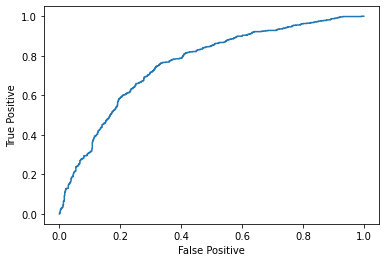

In [136]:
# the above function is applicable for binary classification class
plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 

In [138]:
metrics.roc_auc_score(l, new_df[ 1])

0.760384465370257